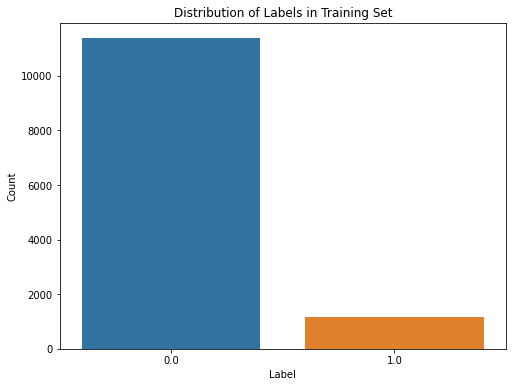

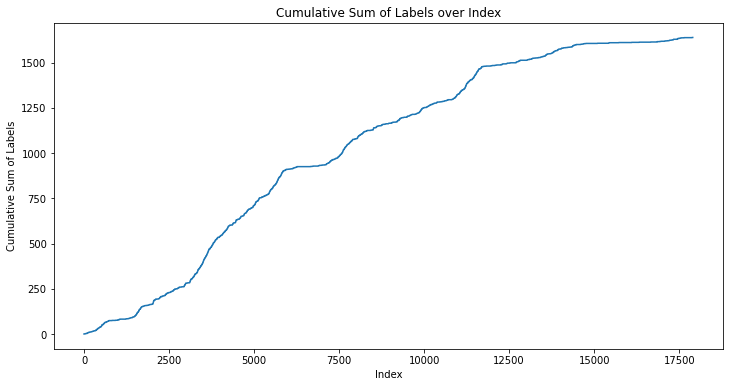

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, make_scorer, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

training_set_percentage = 0.7

# Load data
df = pd.read_csv('HTRU\HTRU_2.csv', header=None)
df['split'] = np.random.randn(df.shape[0], 1)
df = df.astype("float32")

# Define the precision scorer
precision_scorer = make_scorer(precision_score)

# Use train_test_split to split the dataset
train_data, test_data = train_test_split(df, test_size=1 - training_set_percentage, random_state=42)

# Separate features and labels for training set
train_x = train_data.iloc[:, 0:8]
train_label = train_data.iloc[:, 8]

# Separate features and labels for testing set
test_x = test_data.iloc[:, 0:8]
test_label = test_data.iloc[:, 8]

# Visualize the distribution of the labels in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x=train_label)
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Visualize the sum of labels over the index
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 8].cumsum())
plt.title('Cumulative Sum of Labels over Index')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum of Labels')
plt.show()

In [16]:
# Using Random Forest
clf = RandomForestClassifier(n_estimators=200, max_depth=7)

# Train the classifier
clf.fit(train_x, train_label)

# Make predictions on the test set
predictions = clf.predict(test_x)

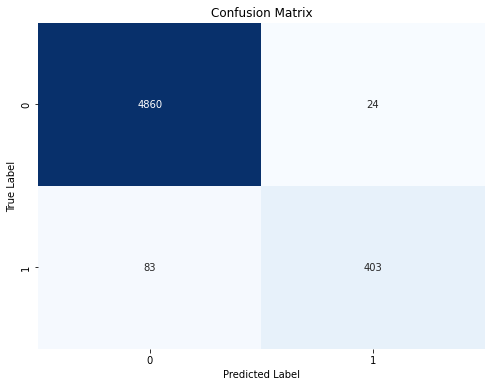

Accuracy: 0.9800744878957169
Cross-Validation Scores: [0.9792498  0.98044693 0.98004789 0.98043912 0.97844311]


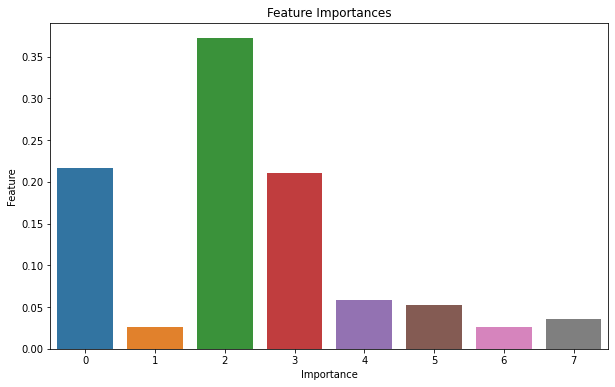

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9832    0.9951    0.9891      4884
         1.0     0.9438    0.8292    0.8828       486

    accuracy                         0.9801      5370
   macro avg     0.9635    0.9122    0.9360      5370
weighted avg     0.9796    0.9801    0.9795      5370



In [17]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(test_label, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_label, predictions)
print(f"Accuracy: {accuracy}")

# cross-validation
scores = cross_val_score(clf, train_x, train_label, cv=5)
print(f'Cross-Validation Scores: {scores}')

# Get feature importances
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': clf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Classification report with multiple metrics
class_report = classification_report(test_label, predictions, digits=4)
print("Classification Report:")
print(class_report)

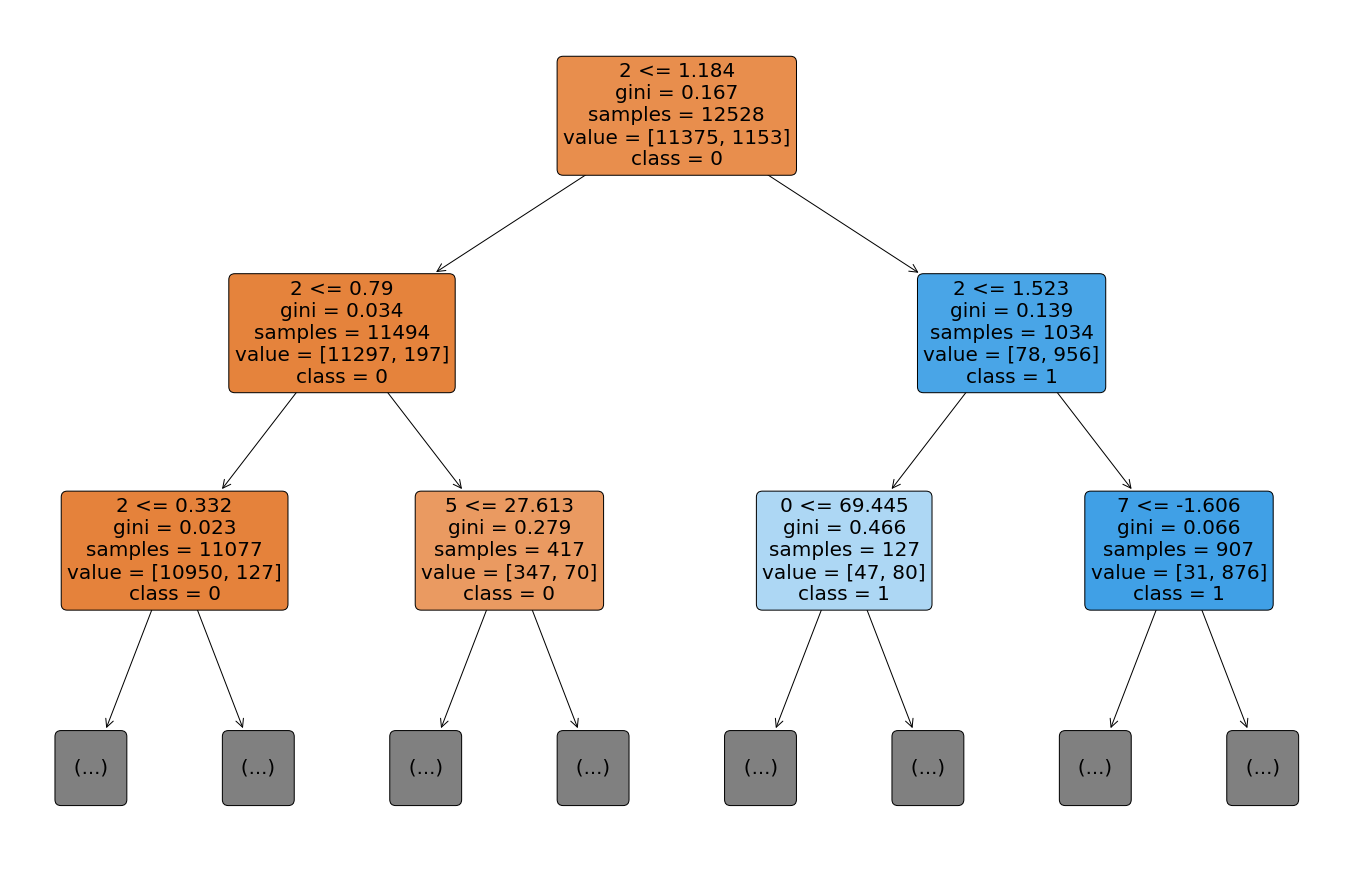

In [29]:
# Using single Decision tree
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=7)

# Train the classifier
clf.fit(train_x, train_label)

# Make predictions on the test set
predictions = clf.predict(test_x)

plt.figure(figsize=(24, 16))
tree.plot_tree(clf, feature_names=train_x.columns, class_names=['0', '1'], filled=True, rounded=True,
               fontsize=20, max_depth=2)
plt.show()

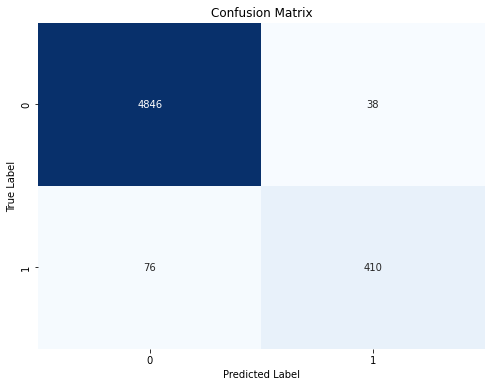

Accuracy: 0.9787709497206704
Cross-Validation Scores: [0.97725459 0.97765363 0.97885076 0.98083832 0.97884232]


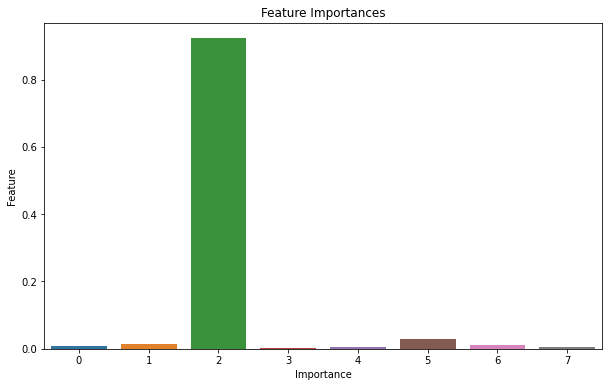

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9846    0.9922    0.9884      4884
         1.0     0.9152    0.8436    0.8779       486

    accuracy                         0.9788      5370
   macro avg     0.9499    0.9179    0.9332      5370
weighted avg     0.9783    0.9788    0.9784      5370



In [19]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(test_label, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_label, predictions)
print(f"Accuracy: {accuracy}")

# cross-validation
scores = cross_val_score(clf, train_x, train_label, cv=5)
print(f'Cross-Validation Scores: {scores}')

# Get feature importances
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': clf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Classification report with multiple metrics
class_report = classification_report(test_label, predictions, digits=4)
print("Classification Report:")
print(class_report)

In [22]:
# Grid search for hyperparameter tuning
param_grid = {'max_depth': [2, 3, 5, 7, 9], 'min_samples_split': [2, 4, 5, 7, 10], 'min_samples_leaf': [1, 2, 4, 6]}

# Perform grid search with precision as the scoring metric
grid_search = GridSearchCV(clf, param_grid, scoring=precision_scorer, cv=5)
grid_search.fit(train_x, train_label)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Using Random Forest
best_clf = RandomForestClassifier(n_estimators=200, max_depth=best_params['max_depth'], 
                                   min_samples_split=best_params['min_samples_split'], 
                                   min_samples_leaf=best_params['min_samples_leaf'])
best_clf.fit(train_x, train_label)

# Make predictions on the test set
predictions = best_clf.predict(test_x)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 10}


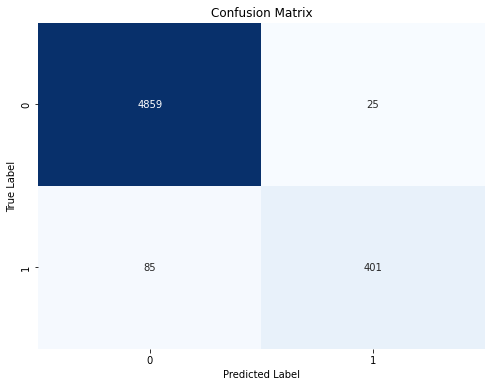

Accuracy: 0.9795158286778398
Cross-Validation Scores: [0.97805267 0.97964884 0.9792498  0.98043912 0.97924152]


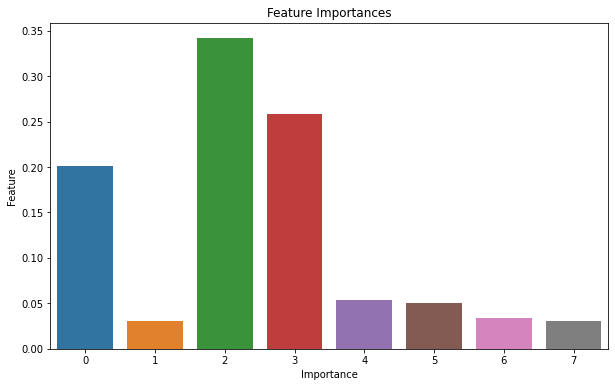

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9828    0.9949    0.9888      4884
         1.0     0.9413    0.8251    0.8794       486

    accuracy                         0.9795      5370
   macro avg     0.9621    0.9100    0.9341      5370
weighted avg     0.9791    0.9795    0.9789      5370



In [23]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(test_label, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_label, predictions)
print(f"Accuracy: {accuracy}")

# cross-validation
scores = cross_val_score(best_clf, train_x, train_label, cv=5)
print(f'Cross-Validation Scores: {scores}')

# Get feature importances
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': best_clf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Classification report with multiple metrics
class_report = classification_report(test_label, predictions, digits=4)
print("Classification Report:")
print(class_report)

In [8]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [2, 3, 5, 7, 9],
              'min_samples_split': [2, 4, 5, 7, 10],
              'min_samples_leaf': [1, 2, 4, 6]}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
                                   scoring=precision_scorer, cv=5, n_iter=100)
random_search.fit(train_x, train_label)

best_params_random = random_search.best_params_
print(f'Best Hyperparameters: {best_params_random}')

# Make predictions on the test set
predictions = random_search.predict(test_x)


Best Hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 7}


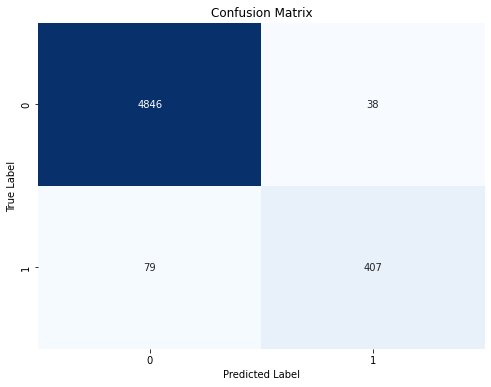

Accuracy: 0.9782122905027933
Cross-Validation Scores: [0.93069307 0.94117647 0.95336788 0.93236715 0.93532338]
Classification Report:
              precision    recall  f1-score   support

         0.0     0.9840    0.9922    0.9881      4884
         1.0     0.9146    0.8374    0.8743       486

    accuracy                         0.9782      5370
   macro avg     0.9493    0.9148    0.9312      5370
weighted avg     0.9777    0.9782    0.9778      5370



In [10]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(test_label, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate the accuracy of the model
accuracy = accuracy_score(test_label, predictions)
print(f"Accuracy: {accuracy}")

# cross-validation
scores = cross_val_score(random_search, train_x, train_label, cv=5)
print(f'Cross-Validation Scores: {scores}')

# Classification report with multiple metrics
class_report = classification_report(test_label, predictions, digits=4)
print("Classification Report:")
print(class_report)